In [2]:
import environ

env = environ.Env()
environ.Env.read_env()
#Todo only load the repo folder
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
fitToolsPath     = env('fitToolsPath')     #* get the path of the script
TestNotebooks    = env('TestNotebooks')    #* get the path of the script   
dataPreparation  = env('dataPreparation')  #* get the path of the script
model_save_dir   = env('model_save_dir')   #* get the path w\here we will save the model
DataSet_Brain_MRI_segmentation   = env('DataSet_Brain_MRI_segmentation')   #* get the path where we will save the model
newFoldersPath   =   env('newFoldersPath')


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(fitToolsPath)
sys.path.append(TestNotebooks)
sys.path.append(dataPreparation)


import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"
print("device = ", device)

device =  cpu


In [2]:
image_Height   = 252
image_Width    = 252

outPutimage_Height = 68
outPutimage_Width  = 68

# image_Channels = 16
batch_size     = 16

In [3]:
# import importlib
# import dataPreparation.brain_MRI_segmentation_preparation 
# importlib.reload(dataPreparation.brain_MRI_segmentation_preparation)
# from dataPreparation.brain_MRI_segmentation_preparation import preparation_brain_MRI_Set

# newFoldersPath =   "C:/Users/malekir1/Documents/dataSets/Brain-MRI-segmentation-prepaer"
# preparation_brain_MRI_Set(DataSet_Brain_MRI_segmentation, newFoldersPath)



In [4]:
from DataSets.dataSet_Img_Vs_Img import DataSet_Img_To_Img
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


inputResize = transforms.Compose([
    transforms.ToPILImage(),  # Convert to PIL Image
    transforms.Resize((image_Height, image_Width)),  # Resize the image
    transforms.Grayscale(num_output_channels=1),  # Convert to black and white
    transforms.ToTensor(),  # Convert to tensor
])


outPutResize = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((outPutimage_Height, outPutimage_Width)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])

root_Data = [newFoldersPath + "/img", newFoldersPath + "/mask"]

myDataSet  = DataSet_Img_To_Img(root_Data, transfor_In_img = inputResize, transfor_Out_img = outPutResize, test = False, dataSize = 100)


Size data set lower definition 3929


image_array.shape =  (252, 252, 1)


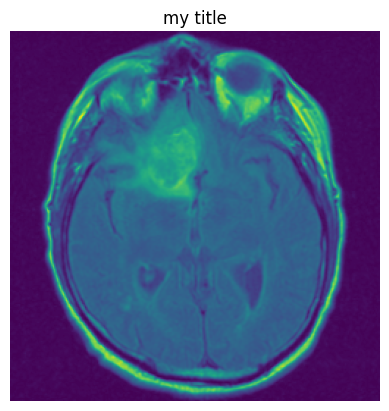

image_array.shape =  (68, 68, 1)


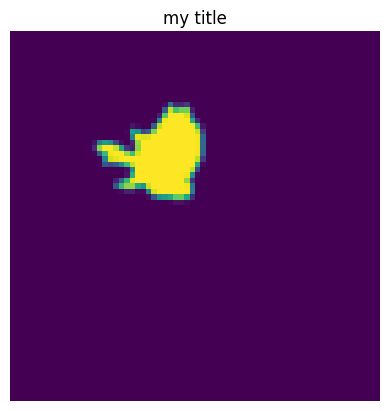

In [5]:
from TestNotebooks.toolsTest import plot_img_tensor

index = 3
plot_img_tensor(myDataSet.__getitem__(index=index)[0], plot_channels = [0])
plot_img_tensor(myDataSet.__getitem__(index=index)[1], plot_channels = [0])


In [6]:
import importlib
import Models.model_U_Net

importlib.reload(Models.model_U_Net)
from Models.model_U_Net import model_u_Net
from Models.model_U_Net import model_U_Net


myModel = model_u_Net()
# myModel = model_U_Net()
myModel.to(device = device)

print(myModel)

model_Umilde_Net(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): SiLU()
  )
  (maxPol1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): SiLU()
  )
  (maxPol2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (3): SiLU()
  )
  (maxPol3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
    (1): SiLU()
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1))
    (3): SiLU()
  )


In [7]:
# import torch
# index = 25
# # Assuming myDataSet.__getitem__(index=index)[0] returns your tensor
# my_tensor = myDataSet.__getitem__(index=index)[0]

# # Add an extra dimension to create a batch of size 1
# batch_tensor = torch.unsqueeze(my_tensor, 0).cuda()

# plot_img_tensor(myDataSet.__getitem__(index=index)[1], [0])
# plot_img_tensor(my_tensor, [0])
# predict = myModel(batch_tensor)[0]
# plot_img_tensor(predict, [0])

In [5]:
pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 682.7 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 378.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ------------------------------- -------- 61.4/78.3 kB 3.4 MB/s eta 0:00:01
   ------------------------------- -------- 61.4/78.3 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 78.3/78.3 kB 624.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\karlo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import importlib

import fitTools.fitFunctions_superResolution
importlib.reload(fitTools.fitFunctions_superResolution)
from fitTools.fitFunctions_superResolution import fitertImgToImg

import torch.nn as nn
from torch import optim
import torch.nn.functional as F


# trainerModel = fitertImgToImg(myModel, 
#                         myDataSet, 
#                         device      = device,
#                         batch_size = batch_size,
#                         # dataSet_Val = myDataSet,
#                         model_save_dir =  model_save_dir)


In [ ]:
fitertImgToImg  

In [10]:
opt_model = optim.Adam(myModel.parameters(), lr = 0.01)
# opt_model = torch.optim.SGD(myModel.parameters(),
#                                  lr=0.01, momentum=0.95,
#                                  weight_decay=1e-4) 

criterion  = nn.BCEWithLogitsLoss()
criterion  = torch.nn.CrossEntropyLoss()

trainerModel.trainModel(opt_model = opt_model, criterion = criterion,num_epochs = 30)

Epoch 1/30 process: 99: 100%|██████████| 246/246 [01:03<00:00,  3.88it/s, modelLoss=1.31]


Epoch completed, TRAIN MAE 1.3068


Epoch 2/30 process: 99: 100%|██████████| 246/246 [01:03<00:00,  3.90it/s, modelLoss=1.31]


Epoch completed, TRAIN MAE 1.3068


Epoch 3/30 process: 99: 100%|██████████| 246/246 [01:03<00:00,  3.89it/s, modelLoss=1.31]


Epoch completed, TRAIN MAE 1.3068


Epoch 4/30 process: 99: 100%|██████████| 246/246 [01:03<00:00,  3.89it/s, modelLoss=1.3] 


Epoch completed, TRAIN MAE 1.3068


Epoch 5/30 process: 99: 100%|██████████| 246/246 [01:03<00:00,  3.90it/s, modelLoss=1.31]


Epoch completed, TRAIN MAE 1.3068


Epoch 6/30 process: 99: 100%|██████████| 246/246 [01:03<00:00,  3.90it/s, modelLoss=1.31]


Epoch completed, TRAIN MAE 1.3068


Epoch 7/30 process: 58:  59%|█████▉    | 146/246 [00:37<00:25,  3.87it/s, modelLoss=1.3] 


KeyboardInterrupt: 

image_array.shape =  (252, 252, 1)


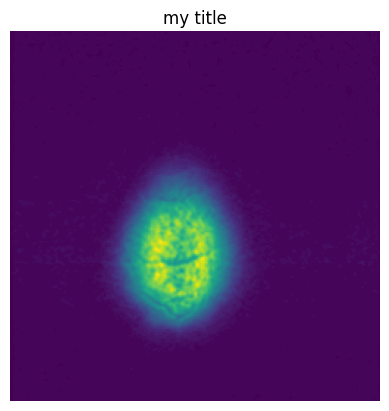

image_array.shape =  (68, 68, 1)


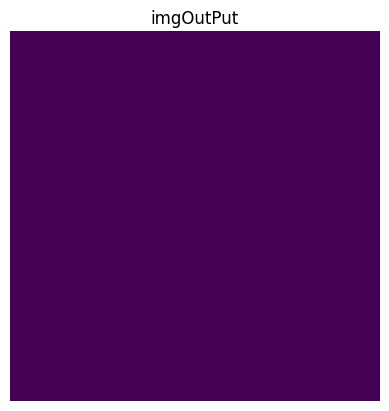

imgInput.shape =  torch.Size([16, 1, 252, 252])
imgOutPut.shape =  torch.Size([16, 4624])
modelOutPut.shape =  torch.Size([16, 2, 4624])
loss =  tensor(0.9483, device='cuda:0', grad_fn=<NllLoss2DBackward0>)


tensor(375, device='cuda:0')

In [17]:

criterion  = torch.nn.CrossEntropyLoss()
index = 8
for idx, (imgInput, imgOutPut) in enumerate(trainerModel.data_loader):
    if idx == index:
        break

imgInput  =  imgInput.to(device)
imgOutPut = imgOutPut.to(device, torch.long)
modelOutPut = myModel(imgInput)
imgOutPut   = imgOutPut

plot_img_tensor(imgInput[0],[0])
plot_img_tensor(imgOutPut[0],[0], "imgOutPut")

modelOutPut = F.softmax(modelOutPut, dim = 1)

modelOutPut = modelOutPut.view(batch_size, 2, -1)
imgOutPut = imgOutPut.view(batch_size,  -1, 68*68).squeeze(1)



# view(2, 1, -1)
print("imgInput.shape = ", imgInput.shape)
print("imgOutPut.shape = ", imgOutPut.shape)
print("modelOutPut.shape = ", modelOutPut.shape)
loss       =  F.cross_entropy(modelOutPut, imgOutPut)

print("loss = ", loss)


# print(modelOutPut[0, 0])
# print(modelOutPut[0, 1])



# plot_img_tensor(modelOutPut[0],[0], "imgOutPut")
# plot_img_tensor(modelOutPut[0],[1], "imgOutPut")
torch.sum(imgOutPut == 1)

In [20]:
trainerModel.history['train_MAE'] = trainerModel.history['train_MAE'][1:]

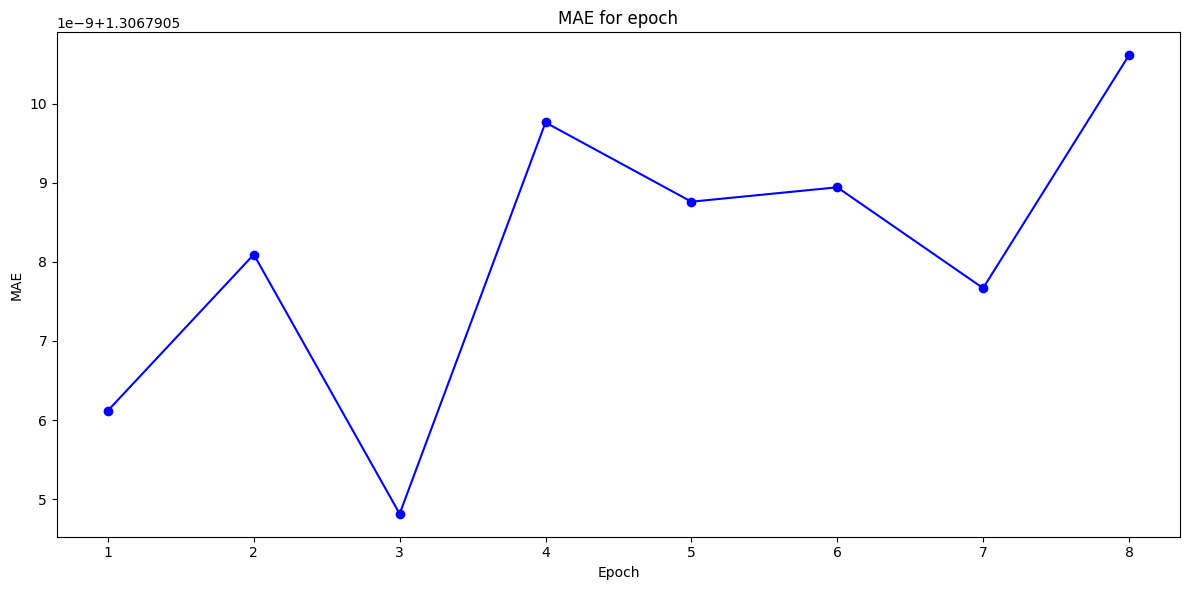

In [21]:
import matplotlib.pyplot as plt

Epochs_values     = range(1, len(trainerModel.history['train_MAE']) + 1)
# Epochs_values_Val = range(1, len(trainerMod
# el.history['MAE_Val']) + 1)

# Create two subplots (one for MAE and one for MAE_Val) in a single row
fig, (plt1) = plt.subplots(1, 1, figsize=(12, 6))

# Plot MAE in the first subplot
plt1.plot(Epochs_values, trainerModel.history['train_MAE'], marker='o', color='blue')
plt1.set_xlabel('Epoch')
plt1.set_ylabel('MAE')
plt1.set_title('MAE for epoch')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [1]:
import torch


torch.Tensor

image_array.shape =  (252, 252, 1)


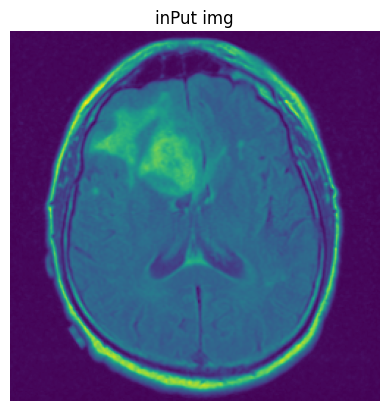

image_array.shape =  (68, 68, 1)


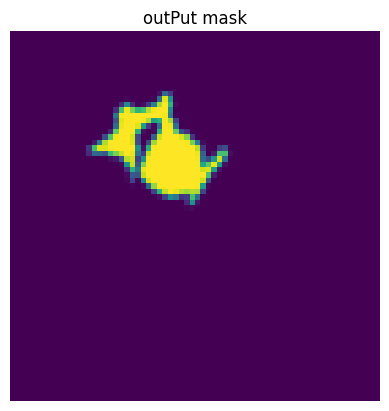

torch.Size([1, 2, 68, 68])
image_array.shape =  (68, 68, 1)


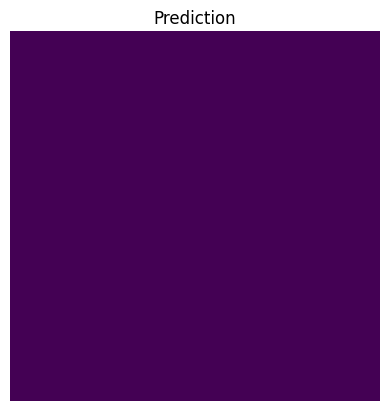

image_array.shape =  (68, 68, 1)


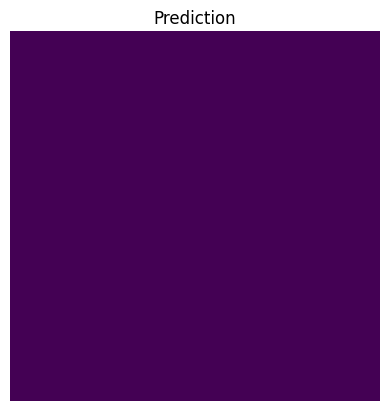

In [30]:

index = 5
plot_img_tensor(myDataSet.__getitem__(index=index)[0], plot_channels = [0], title="inPut img")
plot_img_tensor(myDataSet.__getitem__(index=index)[1], plot_channels = [0], title="outPut mask")

import torch
# Assuming myDataSet.__getitem__(index=index)[0] returns your tensor
inPutimg = myDataSet.__getitem__(index = index)[0]
# Add an extra dimension to create a batch of size 1
batch_tensor = torch.unsqueeze(inPutimg, 0).cuda()
predict = myModel(batch_tensor)
print(predict.shape)
plot_img_tensor(predict[0], [0], "Prediction")
plot_img_tensor(predict[0], [1], "Prediction")


In [27]:
print(predict)


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]], device='cuda:0',
       grad_fn=<SoftmaxBackward0>)
